In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import sklearn
from sklearn import datasets

In [2]:
np.random.seed(333)
random.seed(333)

# Making Datasets
# Dataset 1
mu0_1, mu0_2 = 0.8, 3.5
mu1_1, mu1_2 = 5, 1.2

x0_1 = np.random.normal(mu0_1, 1, 100)
x0_2 = np.random.normal(mu0_2, 1, 100)
x0 = np.array([[x0_1[i], x0_2[i]] for i in range(len(x0_1))])
x1_1 = np.random.normal(mu1_1, 1, 100)
x1_2 = np.random.normal(mu1_2, 1, 100)
x1 = np.array([[x1_1[i], x1_2[i]] for i in range(len(x0_1))])

y0 = np.zeros(100)
y1 = np.ones(100)

x = list(itertools.chain(x0,x1))
y = list(itertools.chain(y0,y1))

data = list(zip(x, y))
random.shuffle(data)
x, y = zip(*data)

x_train = np.array(x[:(int)(len(x)*0.8)])
x_test = np.array(x[:(int)(len(x)*0.2)])
y_train = np.array(y[:(int)(len(y)*0.8)]).reshape((-1,1))
y_test = np.array(y[:(int)(len(y)*0.2)]).reshape((-1,1))

# Dataset 2
xp, yp = sklearn.datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1, random_state=None, factor=0.4)
xp_train = np.array(xp[:(int)(len(xp)*0.8)])
xp_test = np.array(xp[:(int)(len(xp)*0.2)])
yp_train = np.array(yp[:(int)(len(yp)*0.8)]).reshape((-1,1))
yp_test = np.array(yp[:(int)(len(yp)*0.2)]).reshape((-1,1))

Dataset 1


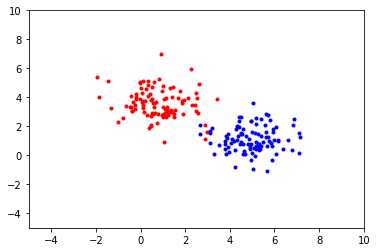

Dataset 2


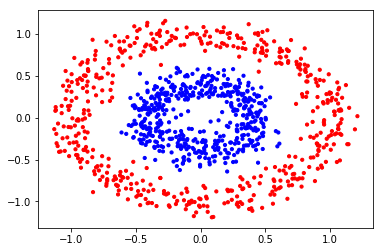

In [3]:
print("Dataset 1")
plt.axis([-5,10,-5,10])
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
plt.show()

print("Dataset 2")
plt.scatter(x=xp[:,0], y=xp[:,1],s=10, c=['r' if i==0 else 'b' for i in yp])
plt.show()

In [4]:
def sigmoid(x):
    return 1/(1 + np.e**(-x))

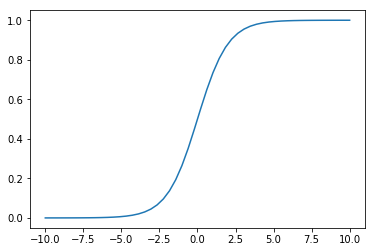

In [5]:
plt.plot(np.linspace(-10,10), sigmoid(np.linspace(-10,10)))

In [6]:
def logistic_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1-y) * np.log(1 - y_pred))

In [7]:
np.random.seed(333)
random.seed(333)

W = np.random.rand(2,1)
b = np.random.rand(1,1)
lr = 0.001

print("init W:",W)
print("init b:",b)
print()

m = len(y_train)

print("Train...")
for epoch in range(1000):
    Z = np.matmul(x_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(y_train, A)
    dZ = A - y_train
    dW = (1/m) * np.matmul(x_train.T, dZ)
    db = np.sum(dZ)
    
    W = W - lr * dW
    b = b - lr * db
    
    if epoch % 100 == 0:
        print(loss)
print("Done!")
print()
print("W:",W)
print("b:",b)
print()

init W: [[0.54329109]
 [0.72895073]]
init b: [[0.01688145]]

Train...
1.4566658148555238
0.5782331433238496
0.4955871626275261
0.4330010546917836
0.3841045254791374
0.34521524432299505
0.3137543768793089
0.2878994864201774
0.2663454059350855
0.24814319505503
Done!

W: [[0.9639804 ]
 [0.25741596]]
b: [[-3.23835009]]



In [8]:
y_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

missed = 0
for i in range(len(y_preds)):
    if y_preds[i] != y_train[i]:
        missed = missed + 1
print("Dataset 1 - Train Accuracy:",(1.0 - (missed/len(y_preds))))

Dataset 1 - Train Accuracy: 0.9375


In [9]:
Z = np.matmul(x_test, W) + b

y_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

missed = 0
for i in range(len(y_preds)):
    if y_preds[i] != y_test[i]:
        missed = missed + 1
print(" Dataset 1 - Test Accuracy:",(1.0 - (missed/len(y_preds))))

 Dataset 1 - Test Accuracy: 1.0


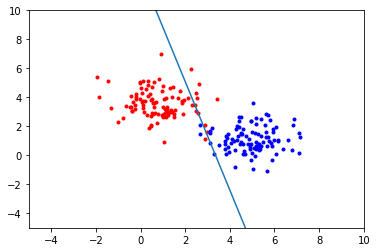

In [10]:
plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')
xvals = np.array(plt.gca().get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b)/ W[1][0]
plt.axis([-5,10,-5,10])
plt.plot(xvals,yvals)
plt.show()

In [11]:
np.random.seed(333)
random.seed(333)

W = np.random.rand(2,1)
b = np.random.rand(1,1)
lr = 0.001

print("init W:",W)
print("init b:",b)
print()

m = len(y_train)

print("Train...")
for epoch in range(1000):
    Z = np.matmul(xp_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(yp_train, A)
    dZ = A - yp_train
    dW = (1/m) * np.matmul(xp_train.T, dZ)
    db = np.sum(dZ)
    
    W = W - lr * dW
    b = b - lr * db
    
    if epoch % 100 == 0:
        print(loss)
print("Done!")
print()
print("W:",W)
print("b:",b)
print()

init W: [[0.54329109]
 [0.72895073]]
init b: [[0.01688145]]

Train...
0.7246282668405791
0.7225024828811609
0.7205328218698075
0.7186878430124968
0.7169605507694194
0.715344231257485
0.7138324548420785
0.7124190765881622
0.7110982348167697
0.7098643480058875
Done!

W: [[0.36635218]
 [0.51115166]]
b: [[0.00178699]]



In [12]:
y_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

missed = 0
for i in range(len(y_preds)):
    if y_preds[i] != yp_train[i]:
        missed = missed + 1
print("Dataset 2 - Train Accuracy:",(1.0 - (missed/len(y_preds))))

Dataset 2 - Train Accuracy: 0.49875


In [13]:
Z = np.matmul(xp_test, W) + b

y_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

missed = 0
for i in range(len(y_preds)):
    if y_preds[i] != yp_test[i]:
        missed = missed + 1
print(" Dataset 2 - Test Accuracy:",(1.0 - (missed/len(y_preds))))

 Dataset 2 - Test Accuracy: 0.46499999999999997


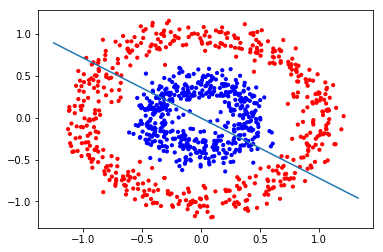

In [14]:
plt.scatter(x=xp[:,0], y=xp[:,1],s=10, c=['r' if i==0 else 'b' for i in yp])
xvals = np.array(plt.gca().get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b)/ W[1][0]
plt.plot(xvals,yvals)
plt.show()

In [15]:
# Neural Network
#
#

In [16]:
def sigmoid(x, d = False):
    if(d==True):
        return x * (1-x)
    return 1/(1 + np.e**(-x))

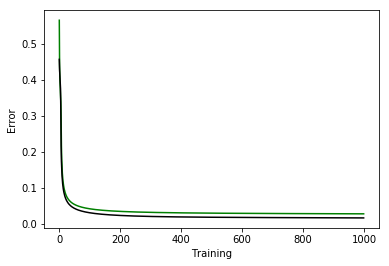

Training Accuracy (Green): 97.27
Validation Accuracy (Black): 98.41


In [17]:
np.random.seed(333)
random.seed(333)

# Weights
w0 = 2*np.random.random((2, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 1)) - 1 #for layer 1 - 5 inputs, 3 outputs
lr = 0.1

# Errors - for graph later
v_errors = []
errors = []

# Train
for i in range(1000):

    # Feed forward
    l0 = x_train
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))

    # Back propagation using gradient descent
    l2_error = y_train - l2
    l2_delta = l2_error * sigmoid(l2, d=True)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * sigmoid(l1, d=True)
    
    w1 += l1.T.dot(l2_delta) * lr
    w0 += l0.T.dot(l1_delta) * lr
    
    error = np.mean(np.abs(l2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    # Validate
    l0 = x_test
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))

    l2_error = y_test - l2

    v_error = np.mean(np.abs(l2_error))
    v_errors.append(v_error)

# Plot the accuracy chart
plt.plot(errors, 'g')
plt.plot(v_errors, 'k')
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy (Green):",round(accuracy,2))

# Validate
l0 = x_test
l1 = sigmoid(np.dot(l0, w0))
l2 = sigmoid(np.dot(l1, w1))

l2_error = y_test - l2

error = np.mean(np.abs(l2_error))
accuracy = (1 - error) * 100

print("Validation Accuracy (Black):",round(accuracy,2))

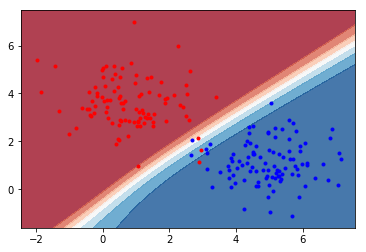

In [18]:
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Feed Forward
l0 = np.c_[xx.ravel(), yy.ravel()]
l1 = sigmoid(np.dot(l0, w0))
Z = sigmoid(np.dot(l1, w1))

plt.plot(x0[:,0],x0[:,1],'r.')
plt.plot(x1[:,0],x1[:,1],'b.')

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

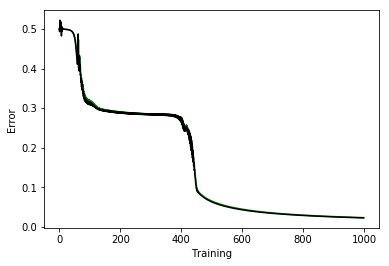

Training Accuracy (Green): 97.67
Validation Accuracy (Black): 97.74


In [19]:
np.random.seed(333)
random.seed(333)

# Weights
w0 = 2*np.random.random((2, 10)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((10, 10)) - 1 #for layer 1 - 5 inputs, 3 outputs
w2 = 2*np.random.random((10, 1)) - 1 #for layer 1 - 5 inputs, 3 outputs
lr = 0.05

# Errors
v_errors = []
errors = []

# Train
for i in range(1000):

    # Feed forward
    l0 = xp_train
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))
    l3 = sigmoid(np.dot(l2, w2))

    # Back propagation
    l3_error = yp_train - l3
    l3_delta = l3_error * sigmoid(l3, d=True)
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * sigmoid(l2, d=True)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * sigmoid(l1, d=True)
    
    w2 += l2.T.dot(l3_delta) * lr
    w1 += l1.T.dot(l2_delta) * lr
    w0 += l0.T.dot(l1_delta) * lr
    
    error = np.mean(np.abs(l3_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    # Validate
    l0 = xp_test
    l1 = sigmoid(np.dot(l0, w0))
    l2 = sigmoid(np.dot(l1, w1))
    l3 = sigmoid(np.dot(l2, w2))

    l3_error = yp_test - l3

    v_error = np.mean(np.abs(l3_error))
    v_errors.append(v_error)

# Plot the accuracy chart
plt.plot(errors, 'g')
plt.plot(v_errors, 'k')
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy (Green):",round(accuracy,2))

# Validate
l0 = xp_test
l1 = sigmoid(np.dot(l0, w0))
l2 = sigmoid(np.dot(l1, w1))
l3 = sigmoid(np.dot(l2, w2))

l3_error = yp_test - l3

error = np.mean(np.abs(l3_error))
accuracy = (1 - error) * 100

print("Validation Accuracy (Black):",round(accuracy,2))

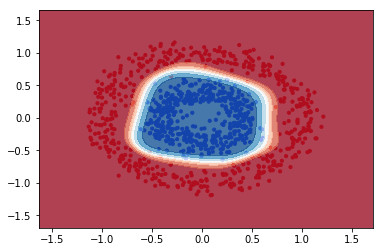

In [20]:
x_min, x_max = xp[:, 0].min() - .5, xp[:, 0].max() + .5
y_min, y_max = xp[:, 1].min() - .5, xp[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Feed Forward
l0 = np.c_[xx.ravel(), yy.ravel()]
l1 = sigmoid(np.dot(l0, w0))
l2 = sigmoid(np.dot(l1, w1))
Z = sigmoid(np.dot(l2, w2))

plt.scatter(x=xp[:,0], y=xp[:,1],s=10, c=['r' if i==0 else 'b' for i in yp])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)

In [21]:
# Made Simple With Pytorch (Stolen From Online)
# https://github.com/jcjohnson/pytorch-examples

import torch

device = torch.device('cpu')

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

learning_rate = 1e-6

for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

    w1.grad.zero_()
    w2.grad.zero_()

0 32405470.0
1 28338588.0
2 25531830.0
3 21246856.0
4 15791687.0
5 10519722.0
6 6601040.0
7 4109763.75
8 2668365.5
9 1847722.0
10 1368033.75
11 1070270.875
12 871839.125
13 729801.375
14 622087.0625
15 536777.375
16 467264.0625
17 409453.875
18 360676.3125
19 319133.1875
20 283503.90625
21 252744.59375
22 225983.59375
23 202607.75
24 182119.015625
25 164092.84375
26 148203.046875
27 134138.25
28 121642.3359375
29 110506.7734375
30 100562.7734375
31 91659.109375
32 83669.1953125
33 76482.953125
34 70012.078125
35 64173.66015625
36 58889.390625
37 54103.04296875
38 49763.05859375
39 45824.30859375
40 42250.8515625
41 39000.11328125
42 36035.34375
43 33329.21875
44 30859.009765625
45 28600.70703125
46 26533.0703125
47 24636.830078125
48 22893.869140625
49 21291.630859375
50 19816.58203125
51 18457.939453125
52 17205.755859375
53 16049.23828125
54 14980.46484375
55 13992.2890625
56 13077.919921875
57 12231.33984375
58 11446.08203125
59 10717.3095703125
60 10041.1826171875
61 9412.728515625